#### MA124 Maths by Computer
# Project: Clustering in real-world networks

#### Background
A network in its simplest form is a graph representation of a real-world system in which nodes are entities of 
interest (e.g., individuals) and edges are pairwise interactions between entities (e.g., connections on social media). 
Networks are useful representations in a wide range of applications, such as sociology, biology, economics, transportation, and so on. 

A broad range of network features can be characterised via properties of matrices commonly used to describe networks. *Communities* or *clusters* are a very commonly studied type of network feature. These are loosely defined as sets of nodes that are strongly connected in a network (e.g., echo chambers in a Twitter social network, brain regions contributing to similar functions in a neuronal network). In this project, we will explore how two matrices known as the *adjacency matrix* and the *Laplacian* can be used to decompose real-world networks into communities. 

#### Suggested reading

*Some references on Community Detection more broadly:* 

1- Mason A. Porter's paper *Communities in Network*, The American Mathematical Society, 2009. Link here: https://arxiv.org/abs/0902.3788

2 - S. Fortunato's survey paper *Community detection in graphs*, Physics Report, 2010. Link here: https://arxiv.org/abs/0906.0612?context=cs

3 - S. Fortunato and Mark. E. J. Newman's opinion piece, *20 Years of Community Detection*, Nature Physics, 2022. Link here: https://arxiv.org/abs/2208.00111

*Some references on Spectral Bipartitioning:* 

1 - Mark E. J. Newman's paper *Finding community structure in networks using the eigenvectors of matrices*, Physical Review E, 2009. Look at Section II *Graph partitioning and the Laplacian matrix* Link here: https://arxiv.org/abs/physics/0605087 

2 - Mark E. J. Newman's book *Networks: An Introduction*: Section 11.5 *Spectral partitioning* in the Chapter *Matrix algorithms and graph partitioning*, 2010. Link here: https://math.bme.hu/~gabor/oktatas/SztoM/Newman_Networks.pdf

3 - Ulrike von Luxburg, *A tutorial on spectral clustering*, Statistics and Computing, 2006. Link here: https://arxiv.org/abs/0711.0189

#### Struture of project

There are 6 tasks in the document below, tasks A1-A4 in Section A and then tasks B1-B2 in section B. Your group should do all of these tasks. A1-A4 are worth approximately 60% of the credit for this submission and tasks B1-B2 are worth approximately the other 40%.

#### Notes on submission
Read through the document **MA124 Maths by Computer Tutor Group Projects_Information for Students_23_24.pdf** on the MA124 Moodle page.

Before submitting see the notes at the end of this document.

#### Allowed libraries for this project: 
networkx numpy matplotlib 

This means that you may include these lines of code at the start of any of your code cells (and please use the aliases given below).

In [1]:
import networkx as nx #for analysing networks
import numpy as np #for maths functionality, including vectors and matrices
import matplotlib.pyplot as plt #for visualising data

## Section A - (worth approximately 60% of the marks)

Let us consider the Zachary Karate Club as a first real-world network example. The Zachary Karate Club is a much studied network in network science. The data was collected about members of a university karate club by Wayne Zachary in 1977. 

Each node represents a member of the club, and each edge represents a tie between two members of the club. A frequently discussed problem using this dataset is to find the two sets of people into which the karate club split after an argument between two teachers in the club.

[ NB: There is a trophy named after this data set that is awarded to the first scientist at a conference on networks who uses the Zachary Karate Club as an example in their talk. You can see past trophy holders here: https://networkkarate.tumblr.com ]

### Task A1 - Preliminaries [approximately 5%]

- Compile the three cells below. These consist of (1) loading the Zachary Karate Club network data; (2) visualizing the network; and (3) visualizing its corresponding adjacency matrix. 
- Write code that prints the size of the adjacency matrix using a numpy function of your choice (e.g., shape) and makes sure its entries are 0 and 1 using a numpy function of your choice (e.g., unique), where 0 (resp. 1) indicates the absence (resp. the presence) of a tie between two club members. 

After running them, add code cell(s) below the following three cells in which to answer the second part of the above.

In [2]:
ZKC_graph = nx.karate_club_graph() # load the Zachary Karate Club network data from the NetworkX package
print("The number of nodes is", ZKC_graph.number_of_nodes()) # print the number of nodes
print("The number of edges is", ZKC_graph.number_of_edges()) # print the number of edges

The number of nodes is 34
The number of edges is 78


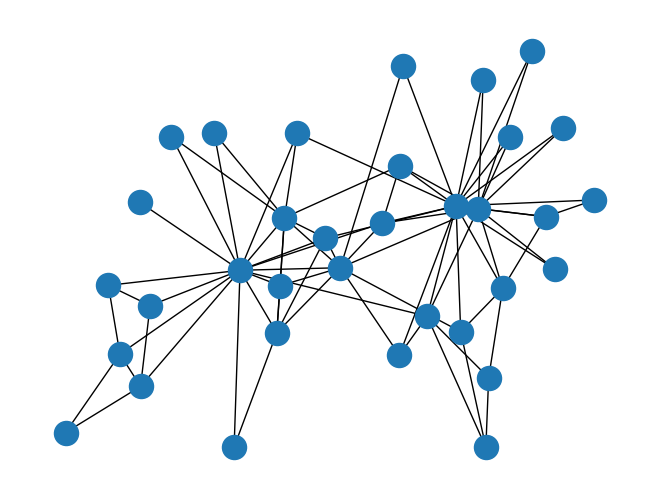

In [22]:
positions = nx.spring_layout(ZKC_graph) # generate a layout for the nodes (you can try different ones by re-compiling this cell), and comment this line out or save the layout if you want to use the same one for subsequent visualizations
nx.draw(ZKC_graph, positions, cmap=plt.cm.prism) # visualize the network (note: for those of you interested in further explore network visualizations, Gephi https://gephi.org is a useful tool)

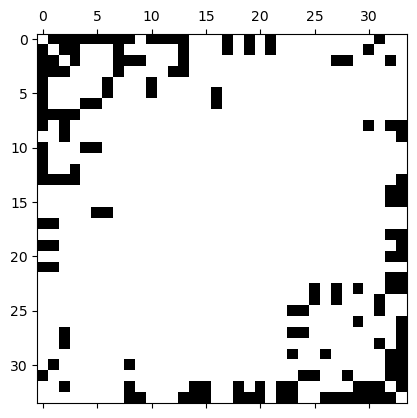

In [4]:
A = nx.to_numpy_array(ZKC_graph) # convert the network into an adjacency matrix 
A = np.where(A >= 1, 1, 0) # binarize the network (the entry is 1 for any nonzero edge weight and 0 otherwise)
plt.spy(A) # visualize the adjacency matrix of the network (with black = 1 and white = 0)

In [5]:
rows, columns = np.shape(A)
print(f"The adjacency matrix has order {rows} x {columns}.")
unique_values = np.unique(A)
print(f"The adjacency matrix only contains the values: {*unique_values,}.")

The adjacency matrix has order 34 x 34.
The adjacency matrix only contains the values: (0, 1).


---
### Task A2 - Degrees [approximately 15%]
#### A2a
What does the function below return for each node $i$ of the network? 

Add a markdown cell below the code cell below in which to answer this question.

In [6]:
def deg_node(A,i):
    k = 0
    for j in range(A.shape[0]):
        k = k + A[i][j]
    return k

The function returns the sum of the $i$th row of the adjency matrix which is the degree of node $i$.

#### A2b 
Write a function that does the following: 
 
- takes as input a matrix A      
- defines a matrix B equal to A minus the transpose of A      
- returns the unique values in B

Then consider how this function could be used to determine whether a matrix is symmetric. Specifically

- Show the output of the function applied to the adjacency matrix A of the Zachary Karate Club. 
- Is the matrix symmetric? What would happen if I considered a row sum instead of a column sum in A2a (i.e., if I swap $i$ and $j$ in the line "k = k + A[ i ] [ j ]") when A is symmetric? 

*Add code and markdown cell(s) below this one to answer these questions.*

In [7]:
def symmetry_score(A):
    B = A - np.transpose(A)
    return np.unique(B)

print(f"The output of the function on A is {symmetry_score(A)}.")

The output of the function on A is [0].


This shows that $A=A^T$ so for all $i,j=1,...,34$, $a_{ij} = a_{ji}$. Hence $A$ is symmetric. If the output of the function is not $[0]$, then the input matrix is not symmetric.

If we considered a row sum instead of a column sum in A2a, we would get the same result since the $i$th column of $A$ is the same as its $i$th row as $A$ is symmetric.

#### A2c
Write a function that does the following: 

- takes as input the adjacency matrix of a network
- computes the degree of each node using a code similar to that in A2a
- stores the node degrees in a numpy array 
- returns the numpy array of node degrees as an output 

Apply this function to the Zachary Karate Club and plot a histogram of its node degrees. 

*Add code cell(s) below to answer this.*

The numpy array of node degrees for A is: [16  9 10  6  3  4  4  4  5  2  3  1  2  5  2  2  2  2  2  3  2  2  2  5
  3  3  2  4  3  4  4  6 12 17].



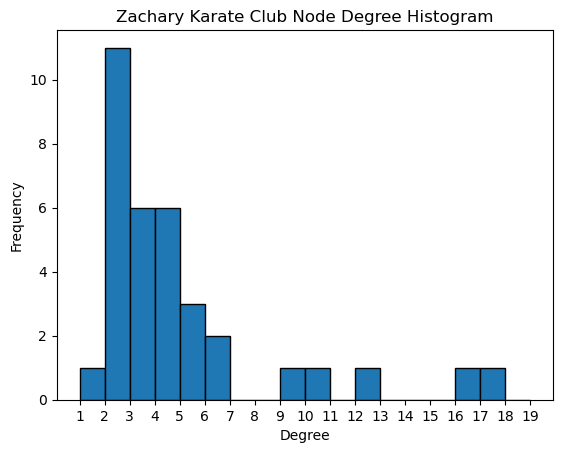

In [8]:
def degree_array(A):
    degrees = []
    for i in range(A.shape[0]):
        k = 0
        for j in range(A.shape[1]):
            k = k + A[i][j]
        degrees.append(k)
    return np.array(degrees)

degrees = degree_array(A)
print(f"The numpy array of node degrees for A is: {degrees}.\n")

bins = np.arange(1, 20, step = 1)
plt.hist(degrees, bins, edgecolor = "black")
plt.xticks(bins)
plt.title('Zachary Karate Club Node Degree Histogram')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.show()

#### A2d 
This is about the Zachary Karate Club network shown below which has nodes colored according to their degree (a darker shade signifies a larger degree). 

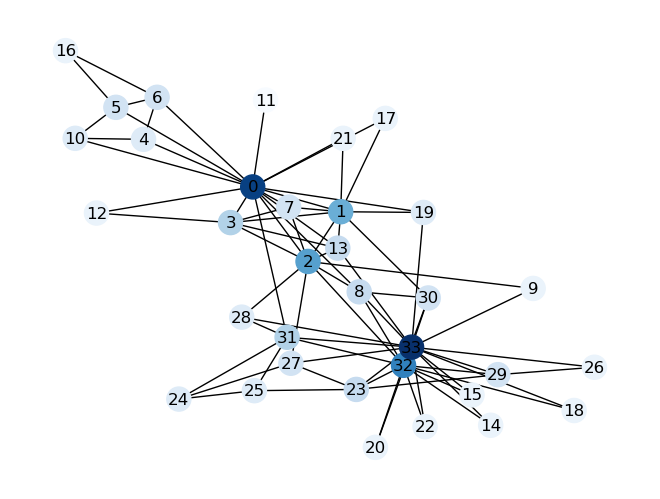

In [9]:
k_seq = ZKC_graph.degree()
k_seq_np = np.array(k_seq)
k_seq_1darray = k_seq_np[:,1]
nx.draw(ZKC_graph, positions, node_color=k_seq_1darray, cmap=plt.cm.Blues,
                            with_labels=True)

- Compute the mean, standard deviation, max, and minimum of the degree sequence.
- Which two nodes in the Zachary Karate club network would you expect to have the two largest degrees? 
- Loosely speaking, what does it mean for a probability distribution to be "heavy-tailed"? 
- Can you give an example of a probability distribution that has been extensively studied when analyzing degree sequences of real-world networks and can be qualified as "heavy-tailed"?
- Can you give two properties that this probability distribution satisfies?

*Add code and markdown cell(s) below to answer the questions above.* 

In [10]:
mean = np.mean(k_seq_1darray)
std = np.std(k_seq_1darray)
max_deg = np.max(k_seq_1darray)
min_deg = np.min(k_seq_1darray)
print(f"Then mean, standard deviation, max, and minimum of the degree sequence are {mean:.2f}, {std:.2f}, {max_deg}, and {min_deg} respectively.") 

Then mean, standard deviation, max, and minimum of the degree sequence are 4.59, 3.82, 17, and 1 respectively.


It is expected that the nodes representing the two teachers would have the highest degrees. 

Losely speaking, a probability distribution is considered "heavy-tailed" when it is skewed in a way that makes extreme events increasingly likely.

An important example of a heavy-tailed degree distribution is a power-law distribution $p(k) = C k^{-\alpha}$, where $C$ is a constant, $\alpha$ is the exponent of the power-law.

Two properties of the power-law distribution are: 
1. **Scale invariance**: Suppose $c_{1}$ is a constant. Then $p(c_{1} k) = Cc_{1}^{-\alpha} k^{-a}$ so $$\begin{align} p(k) \propto k^{-\alpha} \\  \implies p(c_1 k) \propto k^{-\alpha} \end{align}$$

2. **Straight line in log-log plot**: $$\begin{align} p(k) &= Ck^{-\alpha} \\ \log p(k) &= \log C - \alpha \log k  \end{align}$$

---
### Task A3: Laplacian [approximately 20%]
The *Laplacian* $L$ of a symmetric adjacency matrix $A$ is defined as $L = D - A$, where $D$ is a diagonal matrix with $(i,i)$th entry the degree $k_i$ of node $i$. The Laplacian plays many important roles in understanding the structure of networks, and one such role is in understanding the community structure of networks. 

#### A3a 
- Write a function that takes an adjacency matrix as an input and returns the Laplacian of the adjacency matrix as an output. 
- What are the row and column sums of the Laplacian matrix equal to? 
- Verify your answer for the Zachary Karate Club adjacency matrix. 

*Add code and markdown cell(s) below to answer these questions.*

In [11]:
def laplacian(A):
    k_seq = degree_array(A)
    D = np.diagflat(k_seq)
    return D - A
    
L = laplacian(A)
print(f"The Laplacian of the Zachary Karate Club adjacency matrix is: \n\n {L}")

The Laplacian of the Zachary Karate Club adjacency matrix is: 

 [[16 -1 -1 ... -1  0  0]
 [-1  9 -1 ...  0  0  0]
 [-1 -1 10 ...  0 -1  0]
 ...
 [-1  0  0 ...  6 -1 -1]
 [ 0  0 -1 ... -1 12 -1]
 [ 0  0  0 ... -1 -1 17]]


The sum of the $i$th row of matrices $D$ and $A$ each equals the degree of node $i$.

Hence the sum of the $i$th row of $L=D-A$ is $0$. 

Furthermore, $L$ is symmetrical, since both $D$ and $A$ are symmetrical, so its row sums are the same as its column sums.

In [12]:
# verify row and column sums
row_sum = np.sum(L, axis = 0)
column_sum = np.sum(L,axis =1)
print(f"\nThe row sums of the Laplacian are {*row_sum,}.")
print(f"The column sums of the Laplacian are {*column_sum,}.")


The row sums of the Laplacian are (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0).
The column sums of the Laplacian are (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0).


#### A3b
A vector $v \in \mathbb{R}^{N\times 1}$ is said to be an *eigenvector* of a matrix $A \in \mathbb{R}^{N\times N}$ if it satisfies the equality $Av = \lambda v$, for some scalar $\lambda \in \mathbb{R}$. In other words, $v$ is a vector that gets scaled by $\lambda$ when one applies the linear transformation $A$ to it. The scalar $\lambda$ is called the *eigenvalue* of $v$. 

- Using the function *np.linalg.eigh* compute the eigenvectors and eigenvalues of the Laplacian of the Zachary Karate Club. 
- Display the eigenvector corresponding to the first and second smallest eigenvalues.

*Add code cell(s) below to answer the above.*

In [13]:
eigenvalues, eigenvectors = np.linalg.eigh(L) #note that np.linalg.eigh returns eigenvalues in ascending order, each repeated according to its multiplicity.
l1, l2 = eigenvalues[0], eigenvalues[1]
v1, v2 = eigenvectors[:, 0], eigenvectors[:, 1] #also the column eigenvectors[:, i] is the normalized eigenvector corresponding to the eigenvalue eigenvalues[i]

print(f"The eigenvectors corresponding to the first and second smallest eigenvalues, {l1:2f} and {l2:2f}, are: \n\n {v1}  \n\n and \n\n {v2} \n\n respectively.")

The eigenvectors corresponding to the first and second smallest eigenvalues, 0.000000 and 0.468525, are: 

 [0.17149859 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859
 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859
 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859
 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859
 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859
 0.17149859 0.17149859 0.17149859 0.17149859]  

 and 

 [-0.11213743 -0.04128789  0.02321896 -0.05549978 -0.28460453 -0.32372722
 -0.32372722 -0.052586    0.05160128  0.09280089 -0.28460453 -0.21099295
 -0.1094613  -0.01474197  0.16275078  0.16275078 -0.42276533 -0.10018142
  0.16275078 -0.01363713  0.16275078 -0.10018142  0.16275078  0.15569457
  0.15302558  0.16096292  0.18710956  0.12766405  0.0951523   0.16765031
  0.07349964  0.09875343  0.13034546  0.11890326] 

 respectively.


#### A3c

Using A3a, can you explain why 0 is always an eigenvalue of a Laplacian matrix with a constant eigenvector?

(Hint: Mutiplying a matrix by a vector whose entries are all equal to 1 is equivalent to summing the columns of the matrix.)

*Add markdown cell(s) below to answer the above.*

Suppose $L\in \mathbb{R}^{n \times n}$ is a Laplacian matrix and $c\in \mathbb{R}$ is a constant such that $\underline{v} = (c,c,\dots,c)^{T} \in \mathbb{R}^{n}$ is a constant vector. 

Then $L\underline{v} = c L (1,...,1)^T  = (0, ..., 0)^T$ since $L (1,...1)^T$ gives the sum of columns of $L$ which is the zero vector.

Therefore if $\lambda \in \mathbb{R}$ satisfies $L \underline{v} = \lambda \underline{v}$, then $\lambda$ must equal $0$.


---
### Task A4: Spectral bipartioning [approximately 20%]

#### A4a
Suppose we have a partition of a network into two sets of nodes. The number of edges $R$ falling between these sets is called the cut size and is given by 
\begin{equation*}
R = \frac{1}{2}\sum_{\substack{i,j \text{ in} \\\text{different}\\ \text{sets}}} A_{ij}\,.
\end{equation*}
Show that $R$ can be rewritten as $R = \frac{1}{4}s^TLs$ where 

\begin{equation*}  
s_i = 
     \begin{cases}
       +1 &\quad\text{if node } i \text{ belongs to set } 1 \\
       -1 &\quad\text{if node } i \text{ belongs to set } 2\,. \\
     \end{cases}
\end{equation*}

*Add a markdown cell below to answer this.*

Note that [1]   $$\frac{1}{2} (1-s_{i} s_{j}) = \begin{cases} 1 & \text{if $i$ and $j$ are in different sets,} \\ 0 & \text{if $i$ and $j$ are in the same sets,} \end{cases}$$

Hence, we can rewrite $R$ as $$\begin{align} R&=\frac14\sum_{ij}(1-s_is_j)A_{ij} \\ &= \frac14  \left( \sum_{ij} A_{ij} - \sum_{ij} s_{i} s_{j} A_{ij} \right) \tag{1}  \end{align}$$

Let $k_i$ denote the degree of node $i$, then $$\sum_{ij} A_{ij} = \sum_i k_i = s_i^2 k_i = \sum_{ij} s_i s_j \delta_{ij} k_i $$
since $s_i^2 = 1$ and $$ 
\delta_{ij} =
\begin{cases}
1 & \text {if $i = j$} \\
0 & \text {otherwise}
\end{cases}
$$

Substituting this in $(1)$ gives $$\begin{align} R &=\frac14\sum_{ij}s_is_j(k_i\delta_{ij}-A_{ij}) \\ &= \frac14\sum_{ij}s_is_j(D_{ij}-A_{ij}) \\ &= \frac14\sum_{ij}s_is_jL_{ij} \\ &= \frac{1}{4}s^TLs  \end{align}$$ 


#### A4b
One way to find clusters is to minimize the cut size of a partition. The eigenvector corresponding to the second smallest eigenvalue of the Laplacian is called the *Fiedler vector*.
It can be shown that an approximate solution to cut size minimization for the case of two clusters can be obtained through the Fiedler vector. Using the signs of the Fiedler eigenvector, one can write a heuristic algorithm that splits the nodes in the Karate Club into two clusters. One can then encode the clustering using a partition array.
- Can you explain what each line of the function below does? How is a clustering encoded in the output partition? 

*Add a markdown cell below the code block below to answer this.*

In [14]:
def spectral_bipartitioning(A, k_seq):
    laplacian_matrix = np.diagflat(k_seq) - A
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
    index_1 = np.argsort(eigenvalues)[1]
    partition = [val >= 0 for val in eigenvectors[:, index_1]]
    partition_array = 1*np.reshape(partition, A.shape[0])
    return partition_array

**Line 1 :** Defines a function called `spectral_bipartitioning` which takes in two parameters : 

-  `A`, the adjacency matrix of the network 
-  `k_seq`, the sequence of $k_i$ (number of edges connected to the node $i$)

--- 

**Line 2 :** Defines `laplacian_matrix` ($L$) as the matrix of the form : $L = D - A$, where $D$ is the matrix with entries of the form : 

$$
D_{ij} = 
\begin{cases} 
k_i & \text{if $i = j$} \\ 
0 & \text{otherwise} 
\end{cases} 
$$


- Matrix $D$ is defined by the function `np.diagflat(k_seq)` 
- `np.diagflat(k_seq)` forms a matrix with `k_seq` as the entries of the main diagonal and $0$ everywhere else

---
 
**Line 3 :** Uses the function `np.linalg.eigh` to compute the eigenvalues and eigenvectors of the Laplacian
- The eigenvalues of the Laplacian are assigned to `eigenvalues`
- The eigenvectors of the Laplacian are assigned to `eigenvectors`

--- 

**Line 4 :** 
- Uses the function `np.argsort` to put the eigenvalues of the Laplacian in ascending order 
- Assigns the second smallest eigenvalue ($\lambda_2$) to `index_1` (using the index `[1]`)

The smallest eigenvalue ($\lambda_1$) is always zero

---

**Line 5 :** Creates an array called `partition` with boolean entries (True or False)
- Looks at the column associated with `index_1` (the eigenvector $v_2$ corresponding to $\lambda_2$)
- Looks at the entries of $v_2$ corresponding to the node $i$ ($v_{2i}$) and checks if $v_{2i} \geq 0$
- If $v_{2i} \geq 0 $, the $i^{th}$ entry is `True`
- Otherwise, the $i^{th}$ entry is `False`

$v_2$ is known as the Fiedler eigenvector of the Laplacian

--- 

**Line 6 :** Creates an array called `partition_array` with binary entries (0 or 1)
- Reshapes `partition` into a one-dimensional array with the same number of columns as the matrix $A$ (using `A.shape[0]`)
- Replaces `True` with `1` 
- Replaces `False` with `0` 
---

**Line 7 :** Returns `partition_array`

--- 

**How is a clustering encoded in the output partition?**

- Nodes $i$ and $j$ should be in the same set if the $i^{th}$ entry and $j^{th}$ entry in the output partition are equal
- This is an approximate solution to minimising the cut size ($R$) between two sets of nodes **(finding two clusters)**

---

#### A4c 
- Apply the function above to the adjacency matrix of the Zachary Karate Club. 
- Using the visualization technique in A2d and swapping the colormap "plt.cm.Blues" with "plt.cm.prism", visualize the network with nodes colored based on their community.
- Are the two highest degree nodes in different communities? How might you interpret the resulting two communities? 

*Add code and markdown cell(s) below to answer this question.*

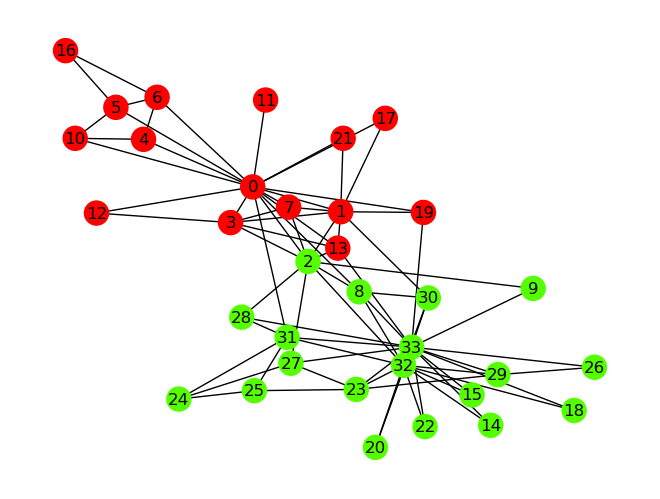

In [15]:
ZKC_partition_array = spectral_bipartitioning(A, k_seq_1darray)
nx.draw(ZKC_graph, positions, node_color=ZKC_partition_array, cmap=plt.cm.prism,
                            with_labels=True)

As shown, the highest degree nodes, namely $0$ and $33$, are in different communities. A possible intepration is that each community represents the supporters of the teacher in that community.

---
---
### Section B (worth approximately 40%) 

### Task B1: Analyse a network of your choice.

#### B1a
Go to the website http://konect.cc and download network data for a **small (e.g., $n \leq 50$), unipartite (i.e., one type of node), unweighted, and undirected (i.e., symmetric adjacency matrix)** network of your choice. Examples include: 

- The Zachary Karate Club (don't choose this one, unless it's for practice!)
- HIV
- Zebra
- Dolphins (note: the input file for Dolphins is already available as part of the assignment, for those that prefer not to follow the steps below)

The steps to download a network of your choice and load it into a Jupyter Notebook are as follows:

a. Choose a network from http://konect.cc/networks/ and click on the corresponding link;

b. Click on "Dataset available for download"; NB: The README file in the downloaded folder contains a brief description of the network and data.

c. Save the "out.FILENAME" in the same folder as your Jupyter notebook; 

d. Adapt the cell below that uses the Zachary Karate Club network to the network that you chose.

*Add code and markdown cell(s) below to answer this question.*

We choose to examine the Dolphins network which is a social network of bottlenose dolphins living off Doubtful Sound, a fjord in New Zealand.  

In [16]:
fh = open("out.dolphins", "rb")
dolphins_graph = nx.read_edgelist(fh, comments='%')
fh.close()
print("The number of nodes is", dolphins_graph.number_of_nodes()) # print the number of nodes
print("The number of edges is", dolphins_graph.number_of_edges()) # print the number of edges

The number of nodes is 62
The number of edges is 159


#### B1b
Using similar steps as for part A, apply the spectral bipartitioning algorithm to the real-world network you chose and visualize the communities. How might you interpret communities in the context of this real-world network? 

*Add code and markdown cell(s) below to answer this question.*

Dolphins network:


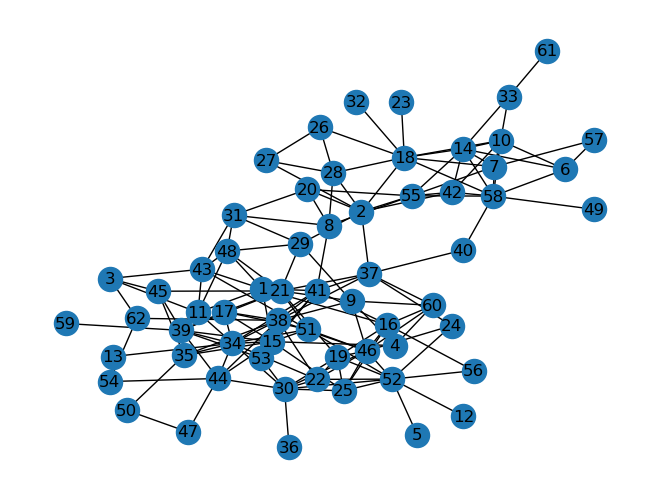

Dolphins network with nodes coloured according to their communities:


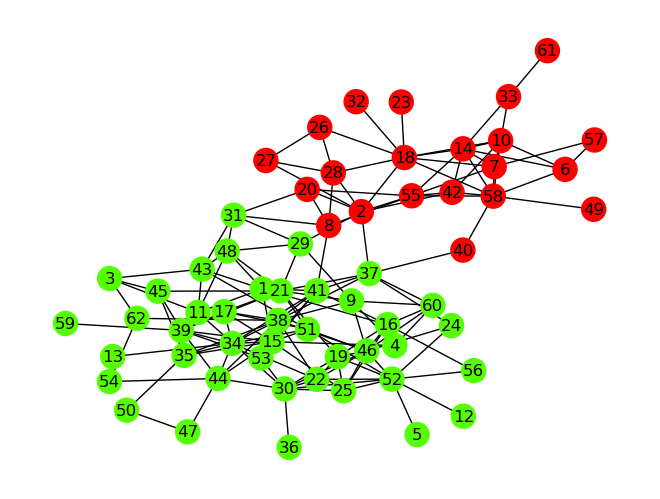

In [23]:
B = nx.to_numpy_array(dolphins_graph) # convert the network into an adjacency matrix 
B = np.where(B >= 1, 1, 0) # binarize the network (the entry is 1 for any nonzero edge weight and 0 otherwise)
dolphins_k_seq = degree_array(B) # get degree sequence of dolphins network
dolphins_colour = spectral_bipartitioning(B, dolphins_k_seq) # apply spectral bipartioning

dolphins_positions = nx.kamada_kawai_layout(dolphins_graph)
print("Dolphins network:")
nx.draw(dolphins_graph, dolphins_positions, cmap=plt.cm.Blues, with_labels=True) #draw dolphins network without commuinities
plt.show()

print("Dolphins network with nodes coloured according to their communities:")
nx.draw(dolphins_graph, dolphins_positions, node_color=dolphins_colour, cmap=plt.cm.prism, with_labels=True)
plt.show()

In [18]:
dolphins_k_seq = list(dolphins_graph.degree())
dolphins_k_seq = np.array(dolphins_k_seq)
dolphins_k_seq = dolphins_k_seq[:,1]
dolphins_k_seq = list(map(int, dolphins_k_seq))

a, b = np.argsort(dolphins_k_seq)[-2:]
print("Highest degree nodes:", list(dolphins_graph.nodes)[a], list(dolphins_graph.nodes)[b])

Highest degree nodes: 46 15


Note that the highest degree nodes, '15' and '46' as found above, are in the same community so we cannot make the same kind of conclusion as we did with the Zachary club network. This partition could suggest that the two communities of dolphins have minimal interactions (cut size is roughly minimised) but we cannot know for sure because low cut size doesn't always translate to a good partition of the network. However, it could be insightful to investigate whether the partitioning correlates with other dolphin traits, like age or gender.

### Task B2: Explore a different clustering method.


Choose another community detection approach (e.g., from https://networkx.org/documentation/networkx-2.4/reference/algorithms/community.html). Explain the method you chose, then apply it to the network you downloaded and/or to the Zachary Karate Club network, and compare the output to spectral bipartitioning (e.g., using a similarity measure known as the "Jaccard score" https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html). What are some of the main differences and similarities between the two approaches? How might you go about extending the spectral bipartioning approach to detect more than two communities? 

*Add code and markdown cell(s) below to answer this question.*

**$k$-Clique percolation**

A $k$-clique is a simple, complete graph with $k$ vertices (contains all possible edges but no loop edges). The method of clique percolation first finds all $k$-cliques in a given graph. Two $k$-cliques are considered adjacent if they share $k-1$ common vertices. A community is then defined as a maximal union of adjacent $k$-cliques [2].

Note that this definition allows overlapping communities since a node can be a part of two or more non-adjacent cliques. Also some nodes may not fall into any community in the case that they are not a part of any $k$-clique.

Node 9 is in communities: [1, 4]
Node 1 is in communities: [1, 4]
Node 18 is in communities: [2, 3]
Node 2 is in communities: [2, 3]
Node 21 is in communities: [1, 4]
Node 31 is in communities: [2, 4]


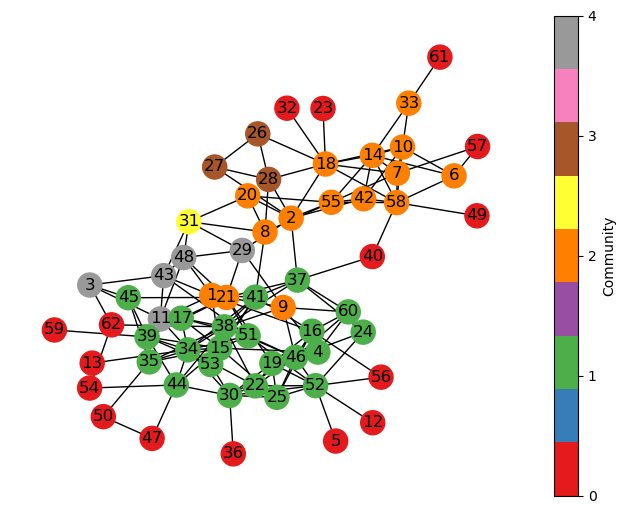

In [19]:
communities = list(nx.community.k_clique_communities(dolphins_graph, 3)) # yields sets of nodes, one for each k-clique community
communities = [list(comm) for comm in communities] 

# create node colour list
num_communities = len(communities)
node_colours = []
for node in dolphins_graph.nodes:
    node_communities = []
    for i in range(num_communities):
        if node in communities[i]: 
            node_communities.append(i+1)

    if len(node_communities) == 1: 
        node_colours.append(node_communities[0])    
    elif len(node_communities) >= 2: 
        node_colours.append(0.75*np.mean(node_communities)) # assign a unique colour
        # print nodes that lie in more than one community
        print("Node", node, "is in communities:", node_communities)
    else: node_colours.append(0)

# visualize communities
cmap = plt.cm.Set1    
nx.draw(dolphins_graph, dolphins_positions, node_color=node_colours, cmap=cmap, with_labels=True)

# create a colorbar
sm = plt.cm.ScalarMappable(norm=plt.Normalize(min(node_colours), max(node_colours)), cmap=cmap)
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label='Community').set_ticks(np.arange(0, len(communities) + 1))

As shown above, there are four $3$-clique communities in the Dolphins network. The nodes of community $0$ (red nodes) are the nodes that don't belong to any $3$-cliques. Also note that some communities overlap - nodes $2$ and $18$, for example, are in both communities $1$ and $2$.

**Measuring partition quality**

Low cut size does not necessarily translate to a good partition of a network since this minimization is easily accomplished by choosing the trivial partition of a single group containing every node [1]. Note that this trivial solution corresponds to the constant eigenvector of the Laplacian. The abvove spectral bipartioning method forbids this trivial solution by choosing $s$ based on the Fiedler vector.

A good partition is one where the number of inter-community edges is lower than would be expected purely by chance [1]. This is the case if and only if the number of edges in each community is higher than expected since the total number of edges is fixed and any edges that do not lie between communities must necessarily lie inside them.

The **modularity** [1] of a partition of graph with adjacency matrix $A$ is defined as $$Q=\frac1{2m}\sum_{ij}[A_{ij}-P_{ij}]\delta(g_i,g_j)$$where 

- $P_{ij}$ denotes denotes the components of a null model matrix, which specifies the expected number of edges between $i$
and $j$. The most popular choice, proposed by Newman is $$P_{ij} = \frac{k_i k_j}{2m}.$$
- The factor $m$ is total number of edges in the given graph.
- $\delta(g_i,g_j)$ is 1 if nodes $i$ and $j$ are classified in the same community and $0$ otherwise.

so $$Q \propto \text{(number of intra-community edges)} - \text{(expected number of such edges)}.$$

Hence higher modularity should, in principle, translate to a better division of a network into communities whereas negative modularity corresponds to less intra-community edges than expected and so a poor division. It can shown that $-1<Q<1.$ 
 
Below we calculate the modularity for the partitions produced by both methods.

In [20]:
# partition nodes based on clique communities
clique_partition = [ [] for _ in range(num_communities) ]
lone_nodes = []

for node in dolphins_graph.nodes:
    node_communities = []
    for i in range(num_communities):
        if node in communities[i]: node_communities.append(i)
    if len(node_communities) >= 1: clique_partition[node_communities[0]].append(node) # place node in first community
    else: lone_nodes.append(node) # if node is not in any community, append to lone_nodes list.    

# calculate modularity of the division of the Dolphins subgraph not containing lone nodes
G = dolphins_graph.copy()
G.remove_nodes_from(lone_nodes) 
print("3-Clique percolation partition modularity:",nx.community.modularity(G, clique_partition))

# find bipartition of subgraph G using dolphins_colour
bipartition = [[], []]
for node in G.nodes:
    j = list(dolphins_graph.nodes).index(node) #find index of node in dolphins_graph.nodes
    bipartition[dolphins_colour[j]].append(node)

# calculate modularity of spectral bipartition of the same subgraph
print("Spectral bipartition modularity:", nx.community.modularity(G, bipartition))

3-Clique percolation partition modularity: 0.41046406308274286
Spectral bipartition modularity: 0.3738877937023816


**Clique percolation vs. spectral bipartioning**

Both methods result in a low number of inter-community edges. Spectral bipartioning clearly produces the lower number of inter-community edges since it aims specifically to minimize cut size. $k$-Clique percolation, however, fouces on maximizing the number of intra-commmunity edges by finding overlapping cliques and it will inevitably find the maximal clique in the network. As a result, it scores higher on modularity and so it arguably performs better than spectral bipartitioning at uncovering community structure in this network. Also note that as $k$ increases, the notion of community becomes more strigent and so the method is less likely to find any communities [2].

Another key difference is that spectral bipartioning partitions the graph so that that each node lies in one of two communities whereas for clique percolation, each node may lie in any number communities (between zero and the number of communities found). This may be more appealing to social networks where we don’t know the number of communities in advance and a person maybe a part of several communities simultaneously or none at all. On the other hand, even though spectral bipartitioning is not well-suited to finding communities in social networks, it is a reasonable method for other applications such as load balancing in parallel computing [2].

**Extending spectral bipartioning to detect more than two communities**

A simple approach is to apply spectral bipartitioning recursively [1]. Communities with the property of having no subdivision that gives a positive contribution to the modularity of the network as a whole we call indivisible. The strategy would be to subdivide communities repeatedly until every remaining community is indivisible.

Modularity of spectral partition:  0.517582374114948


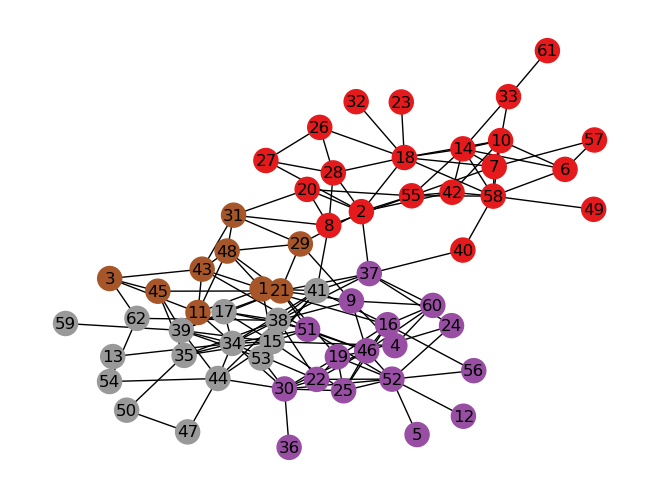

In [21]:
def bipartition(G):
    B = nx.to_numpy_array(G)
    B = np.where(B >= 1, 1, 0)
    k_seq = degree_array(B)
    node_colour = spectral_bipartitioning(B, k_seq)
    partition = [[], []]
    for i in range(len(G.nodes)):
        partition[node_colour[i]].append(list(G.nodes)[i])
    return partition

def spectral_partition(G, community):
    #calculate modularity contribution of spectral bipartition of given community to G
    complement = list(set(G.nodes) - set(community))
    currQ = nx.community.modularity(G, [community, complement]) 
    subgraph = G.subgraph(community)
    subcommunities = bipartition(subgraph)
    newQ = nx.community.modularity(G, subcommunities + [complement]) 
    
    # if modularity contribution is not-postive return community since it is indivisible
    if newQ-currQ <=0: 
        return [community]
    
    # else 
    return spectral_partition(G, subcommunities[0]) + spectral_partition(G, subcommunities[1])

partition = spectral_partition(dolphins_graph, list(dolphins_graph.nodes))  # Apply approach to entire Dolphins graph
print("Modularity of spectral partition: ", nx.community.modularity(dolphins_graph, partition)) # print modularity of this partition

node_colours = []
for node in dolphins_graph.nodes:
    node_communities = []
    for i in range(len(partition)):
        if node in partition[i]: 
            node_colours.append(i+1)
            break

# visualize communities
nx.draw(dolphins_graph, dolphins_positions, node_color=node_colours, cmap=plt.cm.Set1, with_labels=True)

## References

[1] Newman, M. E. J. (2006). Finding community structure in networks using the eigenvectors of matrices. Physical Review E, 74(3). https://doi.org/10.1103/physreve.74.036104

[2] Mason A. Porter's paper *Communities in Network*, The American Mathematical Society, 2009.

## Notes about this submission

You will submit a single Jupyter notebook for this project assignment. Details will be provided for this on the MA124 Moodle page.

- The last thing you should do before submitting the notebook is to Restart Kernel and Run All Cells. You should then save the notebook and submit the .ipynb file. **You will lose marks if you submit a notebook that has not been run.**

- You are expected to add code and markdown cells to this document as appropriate to provide your responses to the tasks. Instructions about this are given throughout but feel free to add markdown cells at any point to provide clarity or comments.

- Likewise, to help the reader, please provide appropriate comments in your code (for example functions or blocks of code should have comments about what they do, variables should be described in comments, as appropriate).